# ASSIGNMENT 14

In [0]:
import numpy
import pandas as pd
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
data=pd.read_csv('preprocessed_data.csv')

In [95]:
data.head()

,Unnamed: 0,Text,Score
0,0,dogs loves chicken product china wont buying a...,0
1,1,dogs love saw pet store tag attached regarding...,1
2,2,infestation fruitflies literally everywhere fl...,0
3,3,worst product gotten long time would rate no s...,0
4,4,wish would read reviews making purchase basica...,0


In [0]:
data=data.drop(['Unnamed: 0'],axis=1)

In [97]:
data.head()

,Text,Score
0,dogs loves chicken product china wont buying a...,0
1,dogs love saw pet store tag attached regarding...,1
2,infestation fruitflies literally everywhere fl...,0
3,worst product gotten long time would rate no s...,0
4,wish would read reviews making purchase basica...,0


In [98]:
data.shape

(50000, 2)

In [0]:
data = data.sample(frac=1).reset_index(drop = True)

In [100]:
data.shape

(50000, 2)

In [0]:
X = data['Text']
y = data['Score']

In [0]:
X_train = X[:40000]
X_test = X[40000:]
y_train = y[:40000]
y_test = y[40000:]

# PREPROCESSING DATA FOR THE MODELING


In [0]:
from keras.preprocessing.text import Tokenizer
top_words=5000
t = Tokenizer(num_words=top_words)
t.fit_on_texts(X_train)
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)

In [0]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)


# MODEL1 (Singal Layer Of LSTM)

In [126]:
# create the model
embedding_vecor_length = 32
model = Sequential()

model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

W0705 14:26:46.662816 139745910429568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 14:26:46.681166 139745910429568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 14:26:46.910787 139745910429568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0705 14:26:46.919233 139745910429568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
history=model.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", (scores[1]*100),"%")

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 471s 12ms/step - loss: 0.0677 - acc: 0.9773 - val_loss: 0.3294 - val_acc: 0.9006
Epoch 2/10
40000/40000 [==============================] - 466s 12ms/step - loss: 0.0631 - acc: 0.9788 - val_loss: 0.3614 - val_acc: 0.9025
Epoch 3/10
40000/40000 [==============================] - 466s 12ms/step - loss: 0.0510 - acc: 0.9837 - val_loss: 0.4116 - val_acc: 0.8934
Epoch 4/10
40000/40000 [==============================] - 470s 12ms/step - loss: 0.0527 - acc: 0.9826 - val_loss: 0.4283 - val_acc: 0.8969
Epoch 5/10
40000/40000 [==============================] - 467s 12ms/step - loss: 0.0351 - acc: 0.9895 - val_loss: 0.5029 - val_acc: 0.8977
Epoch 6/10
40000/40000 [==============================] - 468s 12ms/step - loss: 0.0281 - acc: 0.9919 - val_loss: 0.5285 - val_acc: 0.8944
Epoch 7/10
40000/40000 [==============================] - 469s 12ms/step - loss: 0.0341 - acc: 0.9891 - val_loss: 0.

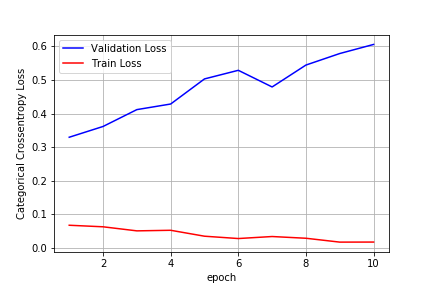

In [141]:
from IPython.display import Image
import matplotlib.pyplot as plt


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,11))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()


# Model 2 (Two Layers Of LSTM)

In [142]:
embedding_vecor_length = 32
model1 = Sequential()
#Layer1
model1.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model1.add(LSTM(100, return_sequences=True))
# for the output from the layer1 putting the value of 'return_sequences' as True

#Layer2
model1.add(LSTM(100))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 293,733
Trainable params: 293,733
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
history=model.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", (scores[1]*100),"%")

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 488s 12ms/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.6019 - val_acc: 0.8972
Epoch 2/10
40000/40000 [==============================] - 483s 12ms/step - loss: 0.0144 - acc: 0.9956 - val_loss: 0.6766 - val_acc: 0.8954
Epoch 3/10
40000/40000 [==============================] - 484s 12ms/step - loss: 0.0128 - acc: 0.9963 - val_loss: 0.6881 - val_acc: 0.8936
Epoch 4/10
40000/40000 [==============================] - 480s 12ms/step - loss: 0.0251 - acc: 0.9922 - val_loss: 0.6098 - val_acc: 0.8945
Epoch 5/10
40000/40000 [==============================] - 472s 12ms/step - loss: 0.0097 - acc: 0.9970 - val_loss: 0.6701 - val_acc: 0.8943
Epoch 6/10
40000/40000 [==============================] - 467s 12ms/step - loss: 0.0060 - acc: 0.9986 - val_loss: 0.7369 - val_acc: 0.8968
Epoch 7/10
40000/40000 [==============================] - 465s 12ms/step - loss: 0.0039 - acc: 0.9991 - val_loss: 0.

Test score: 0.7371434801854193
Test accuracy: 0.8941


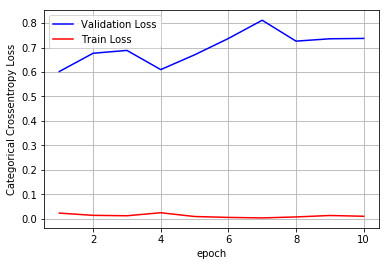

In [144]:
from IPython.display import Image
import matplotlib.pyplot as plt

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,11))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
# Image('my_figure.png')

# CONCLUSION


In [0]:
from prettytable import PrettyTable

In [0]:
table=PrettyTable(['Layers','Architecture','Loss','Accuracy'])
table.add_row(['1','EMBEDDING->LSTM->DROPOUT->DENSE','0.6054','89.26%'])
table.add_row(['2','EMBEDDING->LSTM->LSTM->DENSE','0.7312','89.41%'])

In [148]:
print(table)

+--------+---------------------------------+--------+----------+
| Layers |           Architecture          |  Loss  | Accuracy |
+--------+---------------------------------+--------+----------+
|   1    | EMBEDDING->LSTM->DROPOUT->DENSE | 0.6054 |  89.26%  |
|   2    |   EMBEDDING->LSTM->LSTM->DENSE  | 0.7312 |  89.41%  |
+--------+---------------------------------+--------+----------+


#### FEW POINTS:

* Above Both Models are overfitting.
* We can avoid it adding Dropout Layers and Maxapooling Layers
* Didn't perform above two points because it was taking alot of time.